In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

In [ ]:
dataset = pd.read_csv('https://raw.githubusercontent.com/attuateeq-10/Sepsis_Prediction-using-Machine-Learning/main/sepsis.csv')

In [ ]:
dataset.head(15)


,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,EtCO2,BaseExcess,HCO3,...,WBC,Fibrinogen,Platelets,Age,Gender,Unit1,Unit2,HospAdmTime,ICULOS,SepsisLabel
0,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,83.14,0,0.0,0.0,-0.03,1,0
1,97.0,95.0,0.00,98.0,75.33,0.0,19.0,0.0,0.0,0.0,...,0.0,0.0,0.0,83.14,0,0.0,0.0,-0.03,2,0
2,89.0,99.0,0.00,122.0,86.00,0.0,22.0,0.0,0.0,0.0,...,0.0,0.0,0.0,83.14,0,0.0,0.0,-0.03,3,0
3,90.0,95.0,0.00,0.0,0.00,0.0,30.0,0.0,24.0,0.0,...,0.0,0.0,0.0,83.14,0,0.0,0.0,-0.03,4,0
4,103.0,88.5,0.00,122.0,91.33,0.0,24.5,0.0,0.0,0.0,...,0.0,0.0,0.0,83.14,0,0.0,0.0,-0.03,5,0
5,110.0,91.0,0.00,0.0,0.00,0.0,22.0,0.0,0.0,0.0,...,0.0,0.0,0.0,83.14,0,0.0,0.0,-0.03,6,0
6,108.0,92.0,36.11,123.0,77.00,0.0,29.0,0.0,0.0,0.0,...,0.0,0.0,0.0,83.14,0,0.0,0.0,-0.03,7,0
7,106.0,90.5,0.00,93.0,76.33,0.0,29.0,0.0,0.0,0.0,...,0.0,0.0,0.0,83.14,0,0.0,0.0,-0.03,8,0
8,104.0,95.0,0.00,133.0,88.33,0.0,26.0,0.0,0.0,0.0,...,0.0,0.0,0.0,83.14,0,0.0,0.0,-0.03,9,0
9,102.0,91.0,0.00,134.0,87.33,0.0,30.0,0.0,0.0,0.0,...,0.0,0.0,0.0,83.14,0,0.0,0.0,-0.03,10,0


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38809 entries, 0 to 38808
Data columns (total 41 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   HR                38809 non-null  float64
 1   O2Sat             38809 non-null  float64
 2   Temp              38809 non-null  float64
 3   SBP               38809 non-null  float64
 4   MAP               38809 non-null  float64
 5   DBP               38809 non-null  float64
 6   Resp              38809 non-null  float64
 7   EtCO2             38809 non-null  float64
 8   BaseExcess        38809 non-null  float64
 9   HCO3              38809 non-null  float64
 10  FiO2              38809 non-null  float64
 11  pH                38809 non-null  float64
 12  PaCO2             38809 non-null  float64
 13  SaO2              38809 non-null  float64
 14  AST               38809 non-null  float64
 15  BUN               38809 non-null  float64
 16  Alkalinephos      38809 non-null  float6

In [ ]:
dataset.nunique()

HR                  234
O2Sat                70
Temp                260
SBP                 395
MAP                 520
DBP                 214
Resp                136
EtCO2                 1
BaseExcess           63
HCO3                 43
FiO2                 41
pH                   60
PaCO2               112
SaO2                 81
AST                 211
BUN                 127
Alkalinephos        176
Calcium              65
Chloride             49
Creatinine           96
Bilirubin_direct     34
Glucose             359
Lactate             122
Magnesium            43
Phosphate            95
Potassium            72
Bilirubin_total     101
TroponinI            40
Hct                 324
Hgb                 141
PTT                 508
WBC                 292
Fibrinogen          201
Platelets           464
Age                 912
Gender                2
Unit1                 2
Unit2                 2
HospAdmTime         556
ICULOS              258
SepsisLabel           2
dtype: int64

In [ ]:
dataset.describe(include="all").T

,count,mean,std,min,25%,50%,75%,max
HR,38809.0,77.644979,28.954355,0.00,69.00,82.00,95.00,181.00
O2Sat,38809.0,84.406233,32.984005,0.00,95.00,97.00,99.00,100.00
Temp,38809.0,12.551628,17.532129,0.00,0.00,0.00,36.56,40.50
SBP,38809.0,102.036081,47.501863,0.00,97.00,113.00,130.00,234.50
MAP,38809.0,69.932561,28.396126,0.00,65.00,74.67,85.00,294.00
DBP,38809.0,30.840501,31.363911,0.00,0.00,40.00,59.00,287.00
Resp,38809.0,16.584987,7.851959,0.00,14.00,17.00,21.00,67.00
EtCO2,38809.0,0.000000,0.000000,0.00,0.00,0.00,0.00,0.00
BaseExcess,38809.0,-0.081592,1.465309,-23.00,0.00,0.00,0.00,24.00
HCO3,38809.0,1.940723,6.674337,0.00,0.00,0.00,0.00,48.00


In [ ]:
dataset['SepsisLabel'].value_counts()

0    37945
1      864
Name: SepsisLabel, dtype: int64

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(dataset.drop("SepsisLabel", axis=1), dataset["SepsisLabel"], test_size=0.1, random_state=42)

In [ ]:
# set plots style
sns.set_theme(context="notebook", style="whitegrid", palette="tab10")

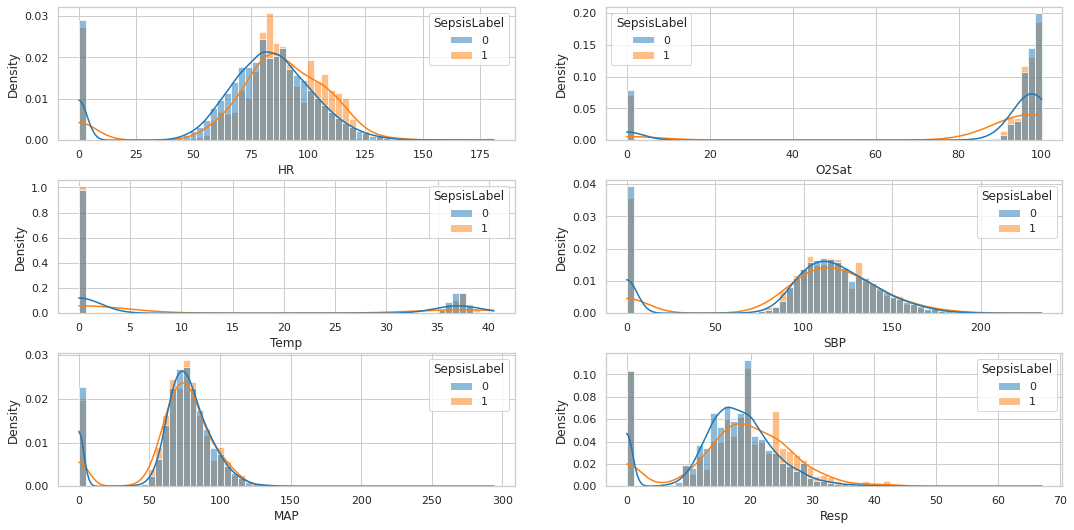

In [ ]:
#X_train.columns

vital_signs = ["HR", "O2Sat", "Temp", "SBP", "MAP", "Resp"]

plt.figure(figsize=(18,12))
plt.subplots_adjust(hspace = .3)
for i, column in enumerate(vital_signs, 1):
    plt.subplot(4,2,i)
    sns.histplot(data=X_train, x=column, hue=y_train, stat="density", common_norm=False, bins=60, kde=True)

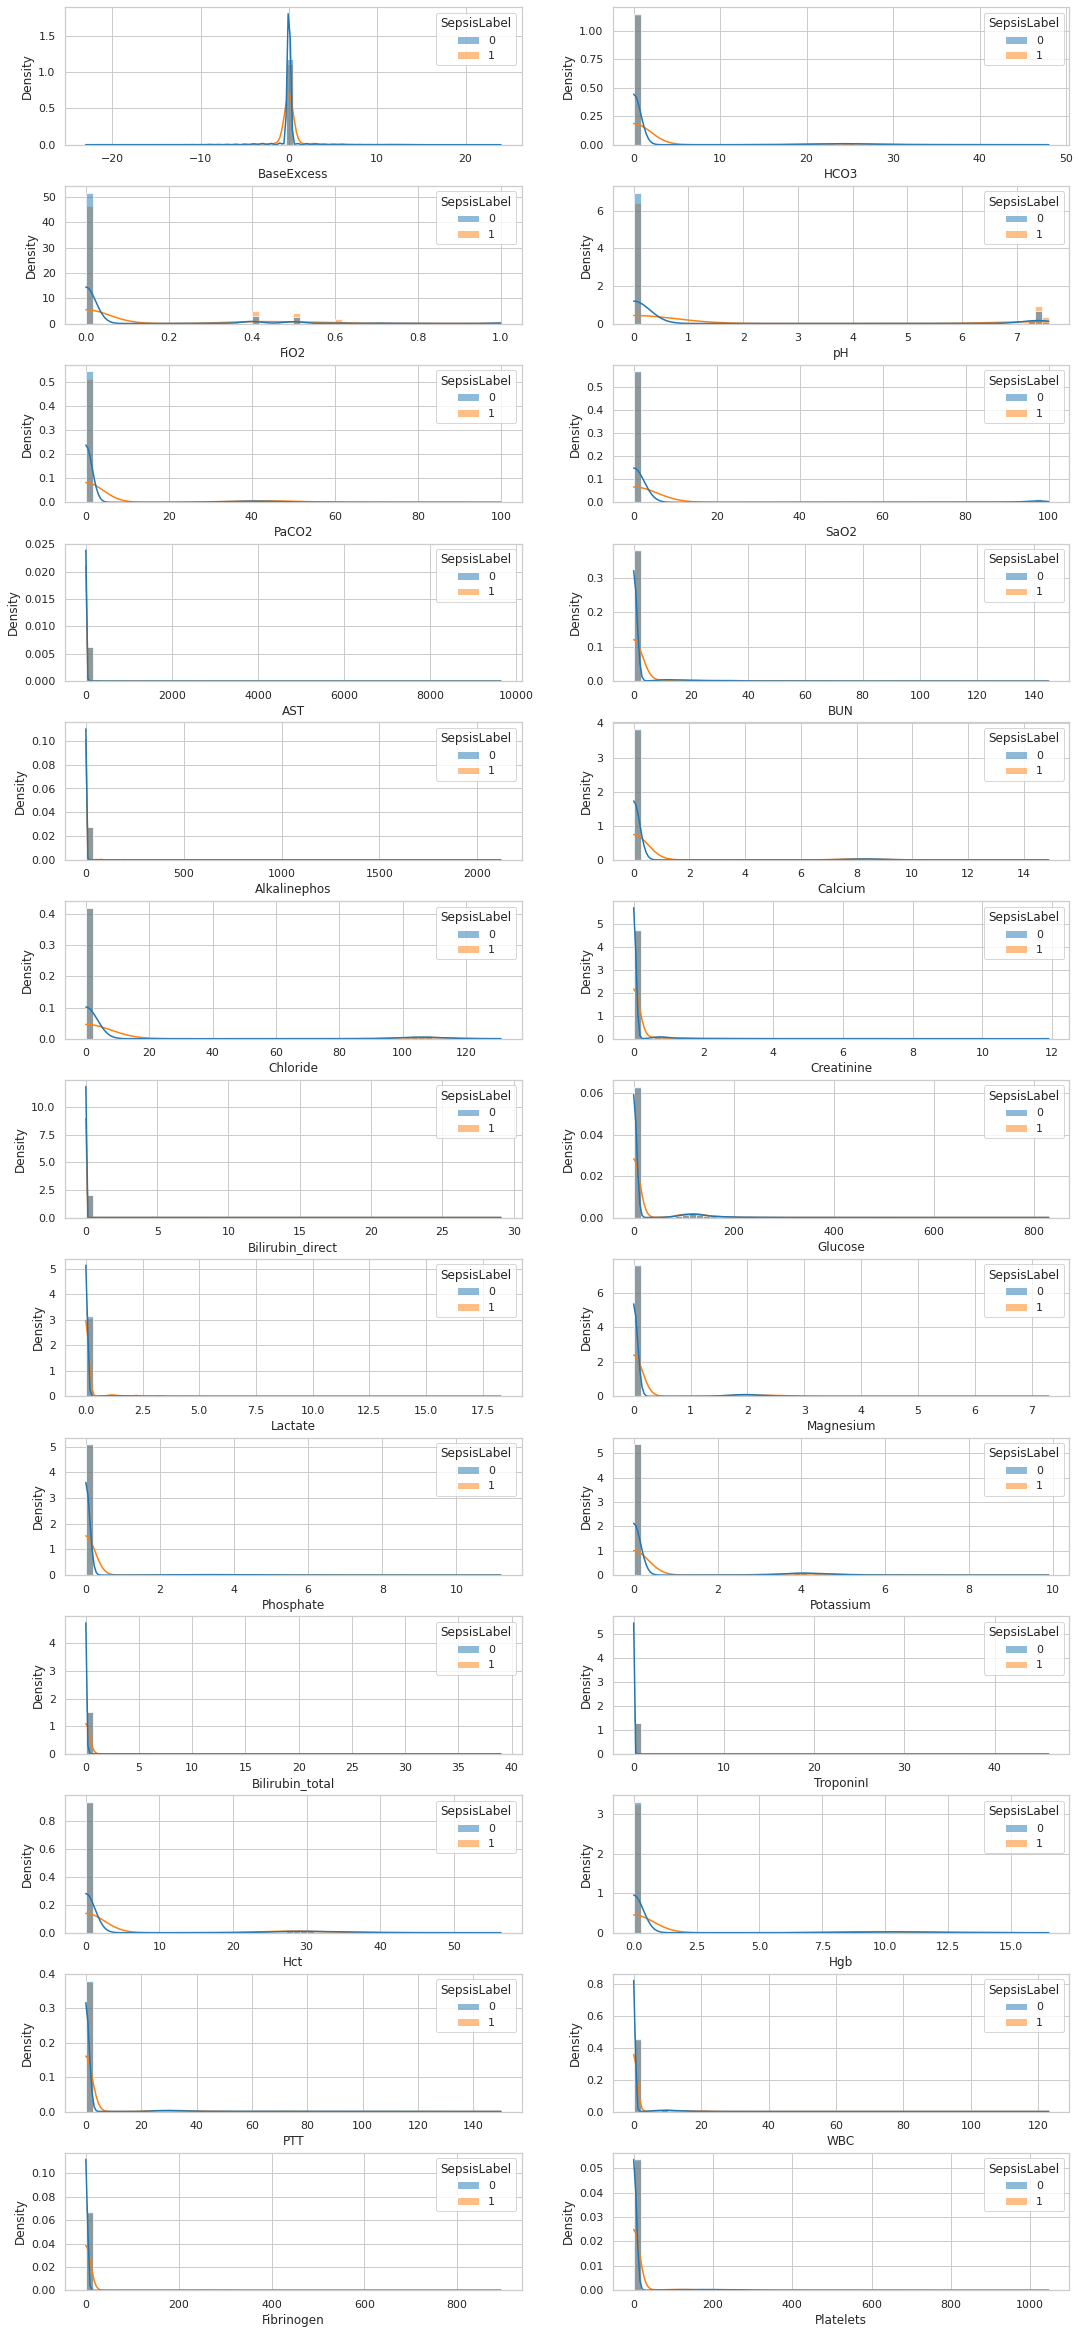

In [ ]:
#X_train.columns

lab_values = ['BaseExcess', 'HCO3', 'FiO2', 'pH', 'PaCO2', 'SaO2', 'AST', 'BUN',
       'Alkalinephos', 'Calcium', 'Chloride', 'Creatinine', 'Bilirubin_direct',
       'Glucose', 'Lactate', 'Magnesium', 'Phosphate', 'Potassium',
       'Bilirubin_total', 'TroponinI', 'Hct', 'Hgb', 'PTT', 'WBC',
       'Fibrinogen', 'Platelets']

plt.figure(figsize=(18,42))
plt.subplots_adjust(hspace = .3)
for i, column in enumerate(lab_values, 1):
    plt.subplot(13,2,i)
    sns.histplot(data=X_train, x=column, hue=y_train, stat="density", bins=60, common_norm=False, kde=True)
    
#plt.savefig("lab_values.png", dpi=400)

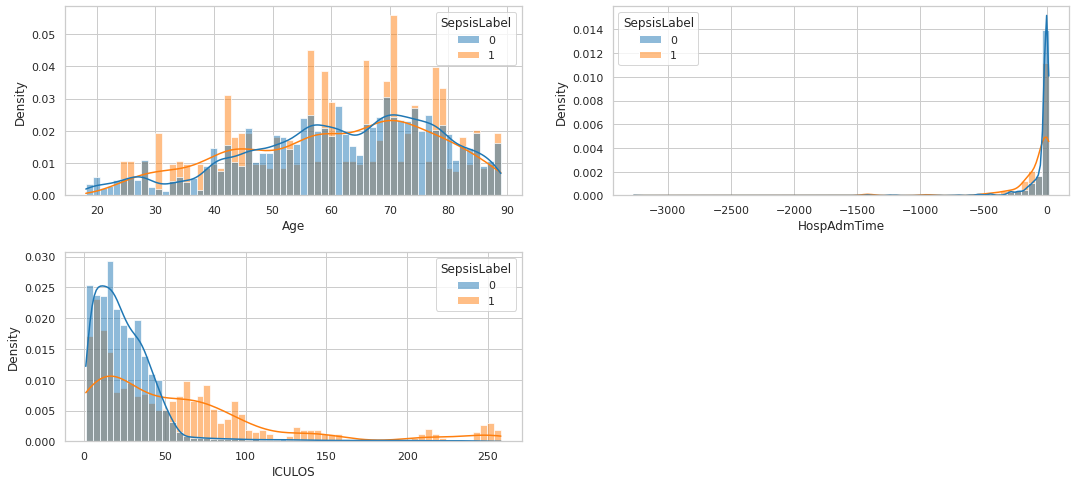

In [ ]:
#X_train.columns

demographics = ["Age", "HospAdmTime", "ICULOS"]

plt.figure(figsize=(18,8))
plt.subplots_adjust(hspace = .3)
for i, column in enumerate(demographics, 1):
    plt.subplot(2,2,i)
    sns.histplot(data=X_train, x=column, hue=y_train, stat="density", bins=60, common_norm=False, kde=True)
    
#plt.savefig("demographics.png", dpi=400)

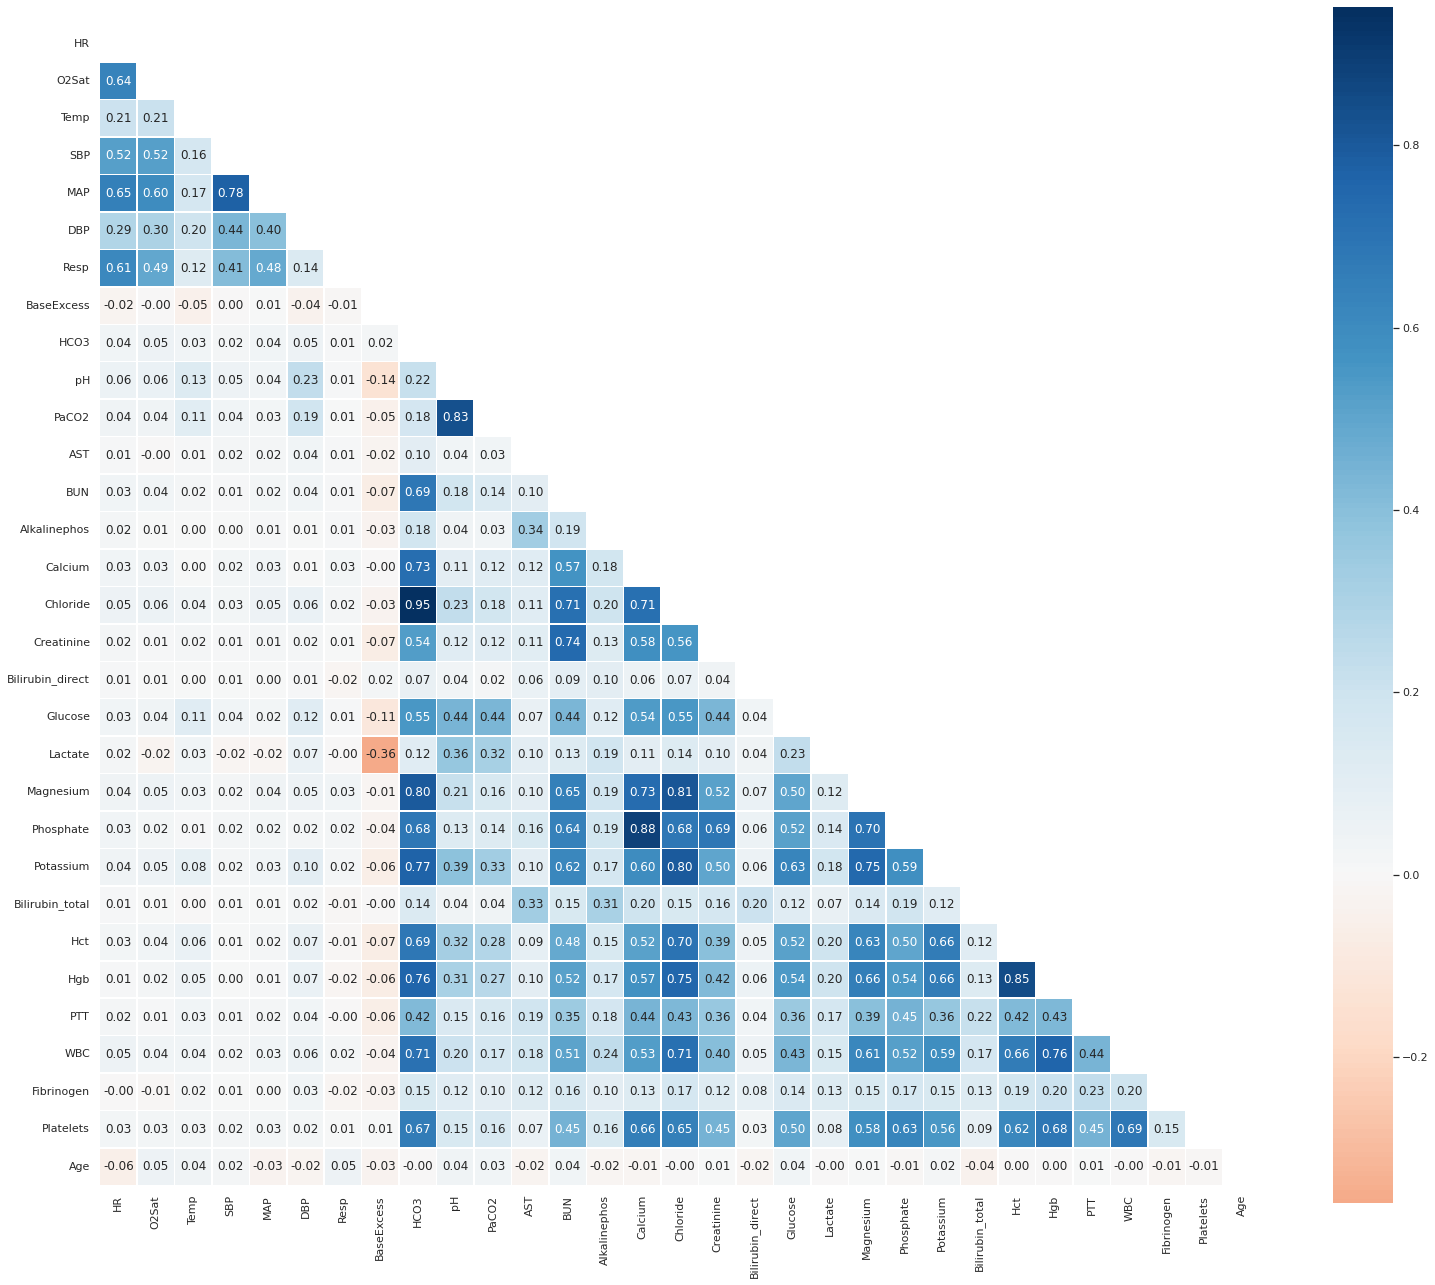

In [ ]:
#X_train.columns
correlation_features = ["HR", "O2Sat", "Temp", "SBP", "MAP", "DBP", "Resp", "BaseExcess", "HCO3", "pH", "PaCO2", "AST",
                       "BUN", "Alkalinephos", "Calcium", "Chloride", "Creatinine", "Bilirubin_direct", "Glucose", "Lactate",
                       "Magnesium", "Phosphate", "Potassium", "Bilirubin_total", "Hct", "Hgb", "PTT", "WBC",
                       "Fibrinogen", "Platelets", "Age"]

mat_corr = X_train[correlation_features].corr()

mask = np.zeros_like(mat_corr)
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize=(26,22))
sns.heatmap(mat_corr, mask=mask, square=True, annot=True, fmt=".2f", center=0, linewidths=.5, cmap="RdBu")

#plt.savefig("cormat.png", dpi=400)

In [ ]:
from sklearn.utils import resample
df_majority =   dataset[dataset.SepsisLabel==0]
df_minority = dataset[dataset.SepsisLabel==1]

In [ ]:
df_minority_upsampled = resample(df_minority, 
                                 replace=True,     # sample with replacement
                                 n_samples=37945,    # to match majority class
                                 random_state=123) # reproducible results


In [ ]:
df_upsampled = pd.concat([df_majority, df_minority_upsampled])

In [ ]:
df_upsampled.SepsisLabel.value_counts()

0    37945
1    37945
Name: SepsisLabel, dtype: int64

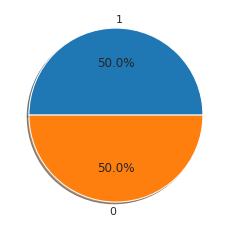

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


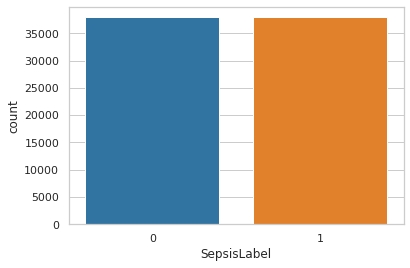

In [ ]:
plt.pie(df_upsampled['SepsisLabel'].value_counts(), labels=['1','0'], autopct='%1.1f%%', shadow=True)
plt.show()
sns.countplot(df_upsampled['SepsisLabel'], label="Count")
plt.show()

In [ ]:
X = df_upsampled[df_upsampled.columns[0:40]].values

In [ ]:
Y = df_upsampled[df_upsampled.columns[40:]].values


In [ ]:
print("sepsis dimensions : {}".format(df_upsampled.shape))

sepsis dimensions : (75890, 41)


In [ ]:
print("sepsis dimensions without label : {}".format(X.shape))

sepsis dimensions without label : (75890, 40)


In [ ]:
print("sepsis dimensions only label : {}".format(Y.shape))

sepsis dimensions only label : (75890, 1)


In [ ]:
labelencoder_Y = preprocessing.LabelEncoder()
Y = labelencoder_Y.fit_transform(Y)

/usr/local/lib/python3.8/dist-packages/sklearn/preprocessing/_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20, random_state=0)
print("Training data dimensions :{}".format(X_train.shape))
print("Testing data dimensions :{}".format(X_test.shape))

Training data dimensions :(60712, 40)
Testing data dimensions :(15178, 40)


In [ ]:
from sklearn.metrics import accuracy_score, log_loss
from sklearn.neural_network import MLPClassifier
classifiers = [
    MLPClassifier(
    activation='tanh',
    solver='lbfgs',
    early_stopping=False,
    hidden_layer_sizes=(40,10,10,10,10, 2),
    random_state=1,
    batch_size='auto',
    max_iter=13000,
    learning_rate_init=1e-5,
    tol=1e-4,
)]

# Logging for Visual Comparison
log_cols=["Classifier", "Accuracy", "Log Loss"]
log = pd.DataFrame(columns=log_cols)

for clf in classifiers:
    clf.fit(X_train, Y_train)
    name = clf.__class__.__name__
    
    print("="*30)
    print(name)
    
    print('****Results****')
    train_predictions = clf.predict(X_test)
    acc = accuracy_score(Y_test, train_predictions)
    print("Accuracy: {:.4%}".format(acc))
    
    train_predictions = clf.predict_proba(X_test)
    ll = log_loss(Y_test, train_predictions)
    print("Log Loss: {}".format(ll))
    
    log_entry = pd.DataFrame([[name, acc*100, ll]], columns=log_cols)
    log = log.append(log_entry)
    
print("="*30)

In [ ]:
sns.set_color_codes("muted")
sns.barplot(x='Accuracy', y='Classifier', data=log, color="b")

plt.xlabel('Accuracy %')
plt.title('Classifier Accuracy')
plt.show()

sns.set_color_codes("muted")
sns.barplot(x='Log Loss', y='Classifier', data=log, color="g")

plt.xlabel('Log Loss')
plt.title('Classifier Log Loss')
plt.show()